<a href="https://colab.research.google.com/github/AlanMarquesRocha/alanmarquesrocha/blob/main/cnn_classification_semin%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exportação e filtragem dos dados de Células de Placas solares:

##Clonando o repositório:

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

# Libraries that will import classes, functions and methods from CNN
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# to show the proposed model metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

tf.__version__

'2.12.0'

In [2]:
!git clone https://github.com/zae-bayern/elpv-dataset.git

Cloning into 'elpv-dataset'...
remote: Enumerating objects: 2695, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2695 (delta 2), reused 7 (delta 1), pack-reused 2686
Receiving objects: 100% (2695/2695), 90.79 MiB | 16.05 MiB/s, done.
Resolving deltas: 100% (32/32), done.


##Adicionando os caminhos necessários para acessar a base :

In [3]:
import sys
sys.path.append('elpv-dataset')
sys.path.append('elpv-dataset/utils')

##Importando a base:

In [4]:
from elpv_reader import load_dataset
images, proba, types = load_dataset()

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers


# Carrega os dados
images, proba, types = load_dataset()

# Separa os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(images, proba, test_size=0.2, random_state=42)

# number of filters for each convolution layer (filters)
c_entrada = [64, 32]

# number of neurons in fully connected layers:
c_dense = [120, 120, 2]

# defining the kernel:
kernel = (3, 3)

# convolution steps (stride)
strd = 1

# defining the activation function of the convolution layers:
act_func = 'relu'

# setting the cnn classifier activation function
act_func_class = 'softmax'

# starting the model
model_cnn = models.Sequential()


# 1st CNN convolution layer
model_cnn.add(layers.Conv2D(c_entrada[0], kernel, strd, activation = act_func, input_shape=(300, 300, 1)))
# 1st CNN Pooling layer (maximum pooling applies)
model_cnn.add(layers.MaxPooling2D((2,2), padding = 'same'))


# 2st CNN convolution layer
model_cnn.add(layers.Conv2D(c_entrada[1], kernel, strd, activation = act_func))
# 2st CNN Pooling layer (maximum pooling applies)
model_cnn.add(layers.MaxPooling2D((2,2), padding = 'same'))


# Conversion of attribute matrix to attribute vector
model_cnn.add(layers.Flatten())


# 1st layer fully connected:
model_cnn.add(layers.Dense(c_dense[0], activation = act_func))
# 2st layer fully connected:
model_cnn.add(layers.Dense(c_dense[1], activation = act_func))

# Last layer of classifier with softmax activation function.
model_cnn.add(layers.Dense(c_dense[2], activation = act_func_class))
                          


In [6]:
# Apresenta o sumário das camadas da CNN
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 120)               2

In [7]:
# definindo o tipo de otimizador e métrica para verificar a assertividade do modelo.
model_cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',
            metrics = ['accuracy'])
     

# definindo o número de épocas
epochs = 10

# showing the network training loss and accuracy at each epoch
history = model_cnn.fit(X_train, y_train, batch_size = 10, epochs = epochs)
     

Epoch 1/10
210/210 [==============================] - 18s 31ms/step - loss: 6.2318 - accuracy: 0.5750
Epoch 2/10
210/210 [==============================] - 6s 27ms/step - loss: 0.5841 - accuracy: 0.5774
Epoch 3/10
210/210 [==============================] - 6s 28ms/step - loss: 0.5860 - accuracy: 0.5765
Epoch 4/10
210/210 [==============================] - 6s 28ms/step - loss: 0.5846 - accuracy: 0.5765
Epoch 5/10
210/210 [==============================] - 6s 29ms/step - loss: 0.5702 - accuracy: 0.5898
Epoch 6/10
210/210 [==============================] - 6s 28ms/step - loss: 0.5865 - accuracy: 0.5779
Epoch 7/10
210/210 [==============================] - 6s 28ms/step - loss: 0.5790 - accuracy: 0.5798
Epoch 8/10
210/210 [==============================] - 6s 28ms/step - loss: 0.5671 - accuracy: 0.5903
Epoch 9/10
210/210 [==============================] - 6s 28ms/step - loss: 0.5820 - accuracy: 0.5784
Epoch 10/10
210/210 [==============================] - 6s 28ms/step - loss: 0.5892 - accur

In [8]:
# Apresenta a acurácia do conjunto de validação do modelo proposto
test_loss, evaluation = model_cnn.evaluate(X_test, y_test, verbose = 2);


print('\nAcurácia do teste atual: ', evaluation);
     

17/17 - 2s - loss: 0.5780 - accuracy: 0.5829 - 2s/epoch - 92ms/step

Acurácia do teste atual:  0.5828571319580078


In [9]:

predict_x = model_cnn.predict(X_test) 
predicted_classes = np.argmax(predict_x, axis = 1)

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10));
sns.heatmap(cm, annot=True)

17/17 [==============================] - 0s 19ms/step


ValueError: ignored

In [10]:
# Mostra a acurácia, recall e f1-score para cada classe do conjunto de teste
num_classes = 2
target_names = ["Class {}".format(i) for i in range(num_classes)]
target_names;

print(classification_report(y_test, predicted_classes, target_names=target_names))
     
     

ValueError: ignored

##Verificando a distribuição de células mono e policristalinas:

In [4]:
num_policristalinas = sum(1 for t in types if t == 'poly')
num_monocristalinas = sum(1 for t in types if t == 'mono')

In [5]:
num_policristalinas

1550

In [6]:
num_monocristalinas

1074

##Destacando as imagens de celulás policristalinas e suas respectivas probabilidades de defeito:

In [7]:
policristalinas = [image for image, module_type in zip(images, types) if module_type == 'poly']

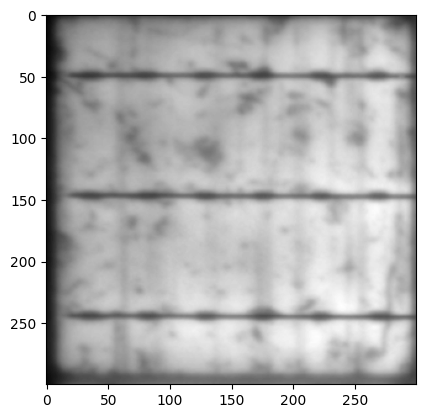

In [8]:
from matplotlib import pyplot as plt

k = 450
plt.imshow(policristalinas[k], cmap='gray');



In [11]:
probabilidades = [prob for prob, module_type in zip(proba, types) if module_type == 'poly']

In [12]:
print('probabilidade de defeito da imagem:',probabilidades[k])

probabilidade de defeito da imagem: 1.0
